<h2 style="color:coral">Example Algorithms</h2>

<H3 style="color:cornflowerblue">K Means Clustering Example</H3>

<H4>Step #1 - Prepare data</H4>

     people  usage
0         7      6
1         3     12
2         4     13
3         4     11
4        13      2
..      ...    ...
145      12      4
146       3      9
147       2      7
148       7      9
149       6      5

[150 rows x 2 columns]


Text(0, 0.5, 'device usage minutes (y-dependent variable)')

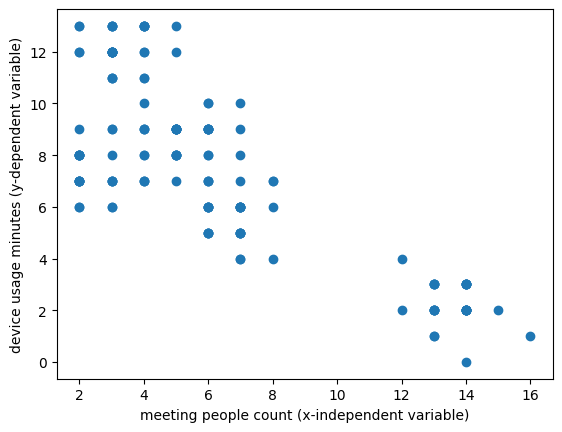

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

#load demo dataset with # of people / device usage mins (fake)
df_people_usage = pd.read_csv("./files/data/people_count_device_usage.csv")
print(df_people_usage)

#region visualization
plt.scatter(df_people_usage["people"],df_people_usage["usage"])
plt.xlabel("meeting people count (x-independent variable)")
plt.ylabel("device usage minutes (y-dependent variable)")
#endregion

<h4>Step #2 - Run KMeans model to identify clusters</h4>

clusters: 5
interia: 183.9728587319244
cluster centers: 
           x          y
0   3.300000  12.233333
1  13.600000   2.233333
2   2.655172   7.379310
3   5.387097   8.806452
4   6.733333   5.700000


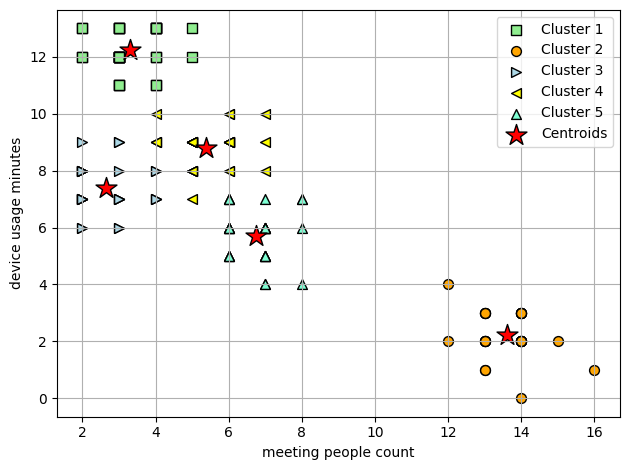

In [14]:
import numpy as np
from sklearn.cluster import KMeans
clusters=5
kmeans_model = KMeans(n_clusters=clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_model.fit( np.array(df_people_usage[['people','usage']]))
df_people_usage['cluster'] = kmeans_model.labels_
intertia = kmeans_model.inertia_
cluster_centers = kmeans_model.cluster_centers_
#region visualization
print('clusters: ' + str(clusters))
print('interia: ' + str(kmeans_model.inertia_))
print('cluster centers: ')
print(pd.DataFrame(kmeans_model.cluster_centers_,columns=['x','y']))
df_people_usage_cluster1 = df_people_usage.loc[df_people_usage['cluster'] == 0]
df_people_usage_cluster2 = df_people_usage.loc[df_people_usage['cluster'] == 1]
df_people_usage_cluster3 = df_people_usage.loc[df_people_usage['cluster'] == 2]
df_people_usage_cluster4 = df_people_usage.loc[df_people_usage['cluster'] == 3]
df_people_usage_cluster5 = df_people_usage.loc[df_people_usage['cluster'] == 4]
plt.scatter(df_people_usage_cluster1["people"],df_people_usage_cluster1["usage"],s=50, c='lightgreen',marker='s', edgecolor='black',label='Cluster 1')
plt.scatter(df_people_usage_cluster2["people"],df_people_usage_cluster2["usage"],s=50, c='orange',marker='o', edgecolor='black',label='Cluster 2')
plt.scatter(df_people_usage_cluster3["people"],df_people_usage_cluster3["usage"],s=50, c='lightblue',marker='>', edgecolor='black',label='Cluster 3')
plt.scatter(df_people_usage_cluster4["people"],df_people_usage_cluster4["usage"],s=50, c='yellow',marker='<', edgecolor='black',label='Cluster 4')
plt.scatter(df_people_usage_cluster5["people"],df_people_usage_cluster5["usage"],s=50, c='aquamarine',marker='^', edgecolor='black',label='Cluster 5')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],s=250, c='red',marker='*', edgecolor='black',label='Centroids' )
plt.legend(scatterpoints=1)
plt.xlabel("meeting people count")
plt.ylabel("device usage minutes")
plt.grid()
plt.tight_layout()
#endregion


<H3>K Nearest Neighbor Example</H3>

Step #3 Train and Test K Nearest Model

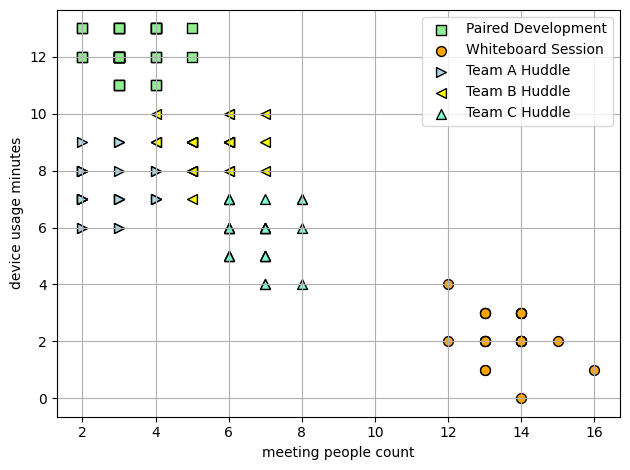

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

knearest_model = neighbors.KNeighborsClassifier(n_neighbors=clusters)
df_train=pd.DataFrame()
df_test=pd.DataFrame()

df_train["people"], df_test["people"], df_train["usage"], df_test["usage"], df_train["cluster"], df_test["cluster"] = \
      train_test_split(df_people_usage['people'], df_people_usage['usage'], df_people_usage['cluster'], test_size=0.2, random_state=7)

knearest_model.fit(np.array(df_train[["people","usage"]]),np.array(df_train["cluster"]))
test_clusters_predicted = knearest_model.predict(np.array(df_test[["people","usage"]]))
test_clusters_predicted_score = knearest_model.score(np.array(df_test[["people","usage"]]),test_clusters_predicted)


#region visualization
#print('clusters: ' + str(clusters))
#print('interia: ' + str(kmeans_model.inertia_))
#print('cluster centers: ')
#print(pd.DataFrame(kmeans_model.cluster_centers_,columns=['x','y']))
df_people_usage_cluster1 = df_people_usage.loc[df_people_usage['cluster'] == 0]
df_people_usage_cluster2 = df_people_usage.loc[df_people_usage['cluster'] == 1]
df_people_usage_cluster3 = df_people_usage.loc[df_people_usage['cluster'] == 2]
df_people_usage_cluster4 = df_people_usage.loc[df_people_usage['cluster'] == 3]
df_people_usage_cluster5 = df_people_usage.loc[df_people_usage['cluster'] == 4]
plt.scatter(df_people_usage_cluster1["people"],df_people_usage_cluster1["usage"],s=50, c='lightgreen',marker='s', edgecolor='black',label='Paired Development')
plt.scatter(df_people_usage_cluster2["people"],df_people_usage_cluster2["usage"],s=50, c='orange',marker='o', edgecolor='black',label='Whiteboard Session')
plt.scatter(df_people_usage_cluster3["people"],df_people_usage_cluster3["usage"],s=50, c='lightblue',marker='>', edgecolor='black',label='Team A Huddle')
plt.scatter(df_people_usage_cluster4["people"],df_people_usage_cluster4["usage"],s=50, c='yellow',marker='<', edgecolor='black',label='Team B Huddle')
plt.scatter(df_people_usage_cluster5["people"],df_people_usage_cluster5["usage"],s=50, c='aquamarine',marker='^', edgecolor='black',label='Team C Huddle')
#plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],s=250, c='red',marker='*', edgecolor='black',label='Centroids' )
plt.legend(scatterpoints=1)
plt.xlabel("meeting people count")
plt.ylabel("device usage minutes")
plt.grid()
plt.tight_layout()
#endregion


Step #4 Predict New Data Point Classification

[1 2 4]


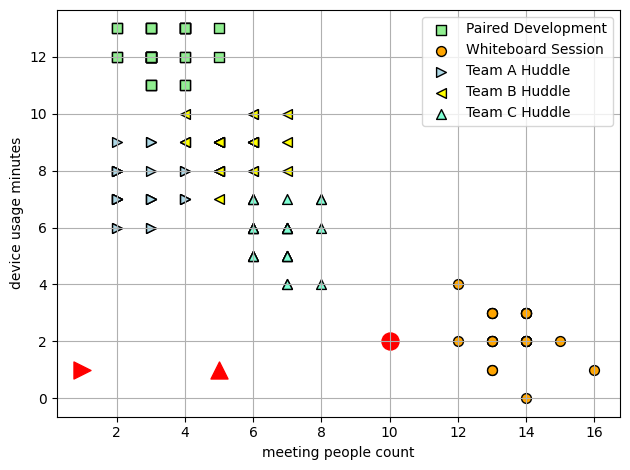

In [16]:
x2y2=[[10,2],[1,1],[5,1]]
clusters2 = knearest_model.predict(x2y2)
print(clusters2)

#region visualization
#print('clusters: ' + str(clusters))
#print('interia: ' + str(kmeans_model.inertia_))
#print('cluster centers: ')
#print(pd.DataFrame(kmeans_model.cluster_centers_,columns=['x','y']))
df_people_usage_cluster1 = df_people_usage.loc[df_people_usage['cluster'] == 0]
df_people_usage_cluster2 = df_people_usage.loc[df_people_usage['cluster'] == 1]
df_people_usage_cluster3 = df_people_usage.loc[df_people_usage['cluster'] == 2]
df_people_usage_cluster4 = df_people_usage.loc[df_people_usage['cluster'] == 3]
df_people_usage_cluster5 = df_people_usage.loc[df_people_usage['cluster'] == 4]

 

plt.scatter(df_people_usage_cluster1["people"],df_people_usage_cluster1["usage"],s=50, c='lightgreen',marker='s', edgecolor='black',label='Paired Development')
plt.scatter(df_people_usage_cluster2["people"],df_people_usage_cluster2["usage"],s=50, c='orange',marker='o', edgecolor='black',label='Whiteboard Session')
plt.scatter(df_people_usage_cluster3["people"],df_people_usage_cluster3["usage"],s=50, c='lightblue',marker='>', edgecolor='black',label='Team A Huddle')
plt.scatter(df_people_usage_cluster4["people"],df_people_usage_cluster4["usage"],s=50, c='yellow',marker='<', edgecolor='black',label='Team B Huddle')
plt.scatter(df_people_usage_cluster5["people"],df_people_usage_cluster5["usage"],s=50, c='aquamarine',marker='^', edgecolor='black',label='Team C Huddle')
#plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],s=250, c='red',marker='*', edgecolor='black',label='Centroids' )

 
df_x2y2=pd.DataFrame(x2y2,columns=["people","usage"])

df_x2y2['cluster']=clusters2

df_x2y2_cluster1 = df_x2y2.loc[df_x2y2['cluster'] == 0]
df_x2y2_cluster2 = df_x2y2.loc[df_x2y2['cluster'] == 1]
df_x2y2_cluster3 = df_x2y2.loc[df_x2y2['cluster'] == 2]
df_x2y2_cluster4 = df_x2y2.loc[df_x2y2['cluster'] == 3]
df_x2y2_cluster5 = df_x2y2.loc[df_x2y2['cluster'] == 4]

plt.scatter(df_x2y2_cluster1["people"],df_x2y2_cluster1["usage"],s=150, c='red',marker='s')
plt.scatter(df_x2y2_cluster2["people"],df_x2y2_cluster2["usage"],s=150, c='red',marker='o')
plt.scatter(df_x2y2_cluster3["people"],df_x2y2_cluster3["usage"],s=150, c='red',marker='>')
plt.scatter(df_x2y2_cluster4["people"],df_x2y2_cluster4["usage"],s=150, c='red',marker='<')
plt.scatter(df_x2y2_cluster5["people"],df_x2y2_cluster5["usage"],s=150, c='red',marker='^')

#print(df_x2y2)

plt.legend(scatterpoints=1)
plt.xlabel("meeting people count")
plt.ylabel("device usage minutes")
plt.grid()
plt.tight_layout()
#endregion

<H3>Linear Regression Example</H3>

<H4>Step #1 - Prepare data</H4>

<strong>1A: Load 5 year Data Set</strong>

In [17]:
import pandas as pd
import os
df_5yr = pd.read_csv('./files/data/room_usage.csv') 
print(df_5yr)


       Day        Date  meeting_minutes  device_seconds
0        0  08/30/2024          1000.00          165565
1        1  08/29/2024           992.50          120059
2        2  08/28/2024           977.00          106771
3        3  08/27/2024           986.50          124459
4        4  08/26/2024           980.75          122641
...    ...         ...              ...             ...
1253  1253  09/09/2019           857.75           77532
1254  1254  09/06/2019           857.75           79205
1255  1255  09/05/2019           861.50          108785
1256  1256  09/04/2019           875.50           93836
1257  1257  09/03/2019           868.50          107144

[1258 rows x 4 columns]


<strong>1B: Get 30 day subset of 5 year dataset

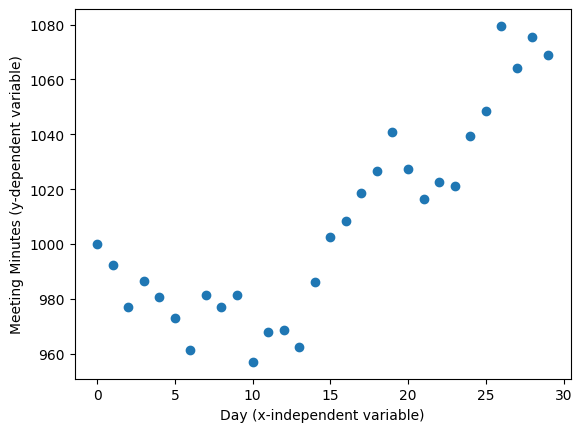

In [18]:
import matplotlib.pyplot as plt         # type: ignore
df = df_5yr.iloc[0:(30)]
X = df['Day']
y = df['meeting_minutes']


plt.xlabel('Day (x-independent variable)')
plt.ylabel('Meeting Minutes (y-dependent variable)')
plt.scatter(X,y)
plt.show()

<h4>Step 2 - Train model using 80% of 30 day dataset</h4>

In [19]:
import numpy as np                                              # type: ignore
from sklearn.linear_model import LinearRegression               # type: ignore
from sklearn.model_selection import train_test_split            # type: ignore

lr_model=LinearRegression()
X = np.array(X).reshape((-1,1))  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lr_model.fit(X_train, y_train)
a=lr_model.intercept_   #intercept 
b=lr_model.coef_        #slope 

print('slope: ' + str(a))
print('intercept' + str(b))

slope: 966.9816666666667
intercept[2.2823913]


<h4>Step 3 - Test Model</h3>

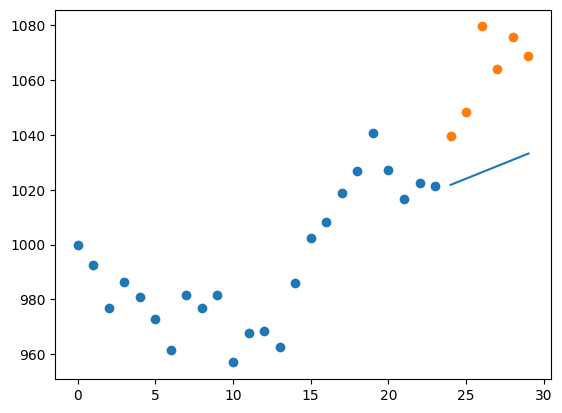

In [20]:
predictions = lr_model.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.plot(X_test,predictions)
plt.show()

<h4>Step 4 - Score Model Test

In [21]:
from sklearn.metrics import r2_score                    # type: ignore
error_deltas = 1-(y_test - predictions) / y_test 
r = np.corrcoef(y_test,predictions)
r2=r2_score(y_test, predictions)

print(error_deltas)
print(r, r2)

24    0.982933
25    0.976673
26    0.950740
27    0.966735
28    0.958520
29    0.966710
Name: meeting_minutes, dtype: float64
[[1.       0.723344]
 [0.723344 1.      ]] -5.73852089793067


<h3>Implement Model - Continous Linear Regression</h3>


<h4>Step #5 - Create function to regression sequence demonstrated above<h4>

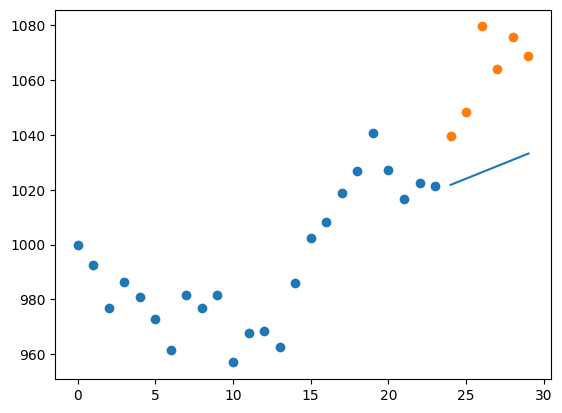

In [22]:
def runRegressionSequence(X,y,visualize=True,weight=None):
    model=LinearRegression()  #KNeighborsRegressor()

    X = np.array(X).reshape((-1,1))  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    
    if(weight == None):
        model.fit(X_train, y_train)
    else:
        weights = np.full(len(X_train),weight)
        model.fit(X_train, y_train, weights)

    predictions = model.predict(X_test)
    
    error_deltas = 1-(y_test - predictions) / y_test 
    r = np.corrcoef(y_test,predictions)
    r2=r2_score(y_test, predictions)
    
    if(visualize):        
        plt.scatter(X_train,y_train)
        plt.scatter(X_test,y_test)
        plt.plot(X_test,predictions)
        plt.show() 
        
    return error_deltas, r2, r

error_deltas, r2, r = runRegressionSequence(X,y)

<h5>Step #6 - Create Processing Algorithm<h5>

In [23]:
error_deltas = []
error_delta_log = []

df_5yr = pd.read_csv('./files/data//room_usage.csv') 
for i in np.arange(0,len(df_5yr)-5):
    df = df_5yr.iloc[i:(i+30)]
    X = df['Day']
    y = df['meeting_minutes']
    
    
    if(len(error_delta_log) == 0):
        error_deltas, r2, r = runRegressionSequence(X,y,visualize=False)
    else:
        error_deltas, r2, r = runRegressionSequence(X,y,weight=np.mean(error_delta_log),visualize=False)
    
    error_delta_log.append(np.mean(error_deltas))    
    print(np.mean(error_delta_log))

0.9670518772200362
0.9719201811682389
0.9769882787883922
0.9841761108257896
0.9910849817987492
0.998329170910022
1.0045519799117393
1.008360130346118
1.0109991636614142
1.0124178562843285
1.012724838247802
1.0114488942512765
1.0097256977279927
1.007723769728657
1.0053818301804145
1.0031791656620341
1.0014956329262934
1.0007316170295308
1.000556493812648
1.000588713356835
1.000865536803219
1.0011684813142159
1.0013156445734577
1.0013519761588794
1.001190615482687
1.0010640490681688
1.0007534255517163
1.0003245329030226
0.9998340672490605
0.9993240608735332
0.998855146920455
0.998488031768981
0.9983419645815279
0.9983314638591632
0.9984143447620318
0.9984357149655066
0.9985807096725846
0.998572452778923
0.9983416952942681
0.9979776047340291
0.9976347113178069
0.9974194302131761
0.9972757929049677
0.9973212812081168
0.9976672739021116
0.9982024479671994
0.9989264083478989
0.9997251488795614
1.0006466760062644
1.0016053934040543
1.0024347542788858
1.0030507095208134
1.0034754282034775
1.00

<h4>Linear Regression without an ML library</h4>

<h5>Step #1 - Prepare Data</h5>

<h5>Step #2 - Calculate Mean Squared Error</h5>


In [24]:
def get_mean_squared_error(df):
    df["x_diff"]=df["x"]-(df["x"].mean())
    df["y_diff"]=df["y"]-(df["y"].mean())
    df["x_diff_y_diff"]=df["x_diff"] * df["y_diff"]
    sum = df["x_diff_y_diff"].sum()
    mse = sum / ((df["x"].count() -1) * df["y"].std() * df["y"].std())
    return mse

<h5>Step #3 - Calculate Line Equation Components a (intercept) and b (slope)</h5>

In [25]:
def get_fit(df, mse):
    #Get slope of line
    b = mse * df["y"].std() / df["x"].std()
    #Get the intercept
    a = df["y"].mean() - b * df["x"].mean()
    return a, b

<h5>Step #4 - Calculate R Squared Value based on observed (actual) events </h5>

In [26]:
def get_r2(df) :
    sst = ((df["y"] - df["y"].mean()) **2).sum()
    ssr = ((df["t"] - df["y"].mean()) **2).sum()
    sse = ((df["t"] - df["o"].mean()) **2).sum()
    rsq = ssr /sst
    return sse,rsq